In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime as dt
import os

import scheme_mar2023 as scheme


In [2]:
plt.style.use('Solarize_Light2')   # try another styles: 'classic'
plt.rcParams['figure.figsize'] = [15, 15]
driver = 'G:/'  # '~/'
pwd = os.path.join(driver, "1_Data1/sea/")
destData = os.path.join(pwd, "AllSeaGisOut.txt")
obrisData = os.path.join(driver, "1_Data1/obris/obris.dat")
batimetrFile = os.path.join(driver, "1_Data1/batimetria/b1.txt")
pwd

'G:/1_Data1/sea/'

In [3]:
obris = pd.read_csv(obrisData,
                    header=0,
                    na_values='--',
                    sep='\t',
                    decimal=',',
                    )
obris.head(3)

,i,long,lat
0,1,NaN,NaN
1,2,109.004,53.667
2,3,109.008,53.665


In [37]:
df = pd.read_csv(os.path.join(pwd, "all.txt"),
                 header=0,
                 # skip_blank_lines=True,
                 skipinitialspace=True,
                 na_values='--',
                 sep='\t',
                 decimal='.',
                 # nrows=100000,
                 parse_dates=['DateTime'],
                 dayfirst=False,
                 )


In [38]:
dff = pd.read_csv(os.path.join(pwd, "AllSeaO.dat"),
                 header=0,
                 # skip_blank_lines=True,
                 skipinitialspace=True,
                 na_values='--',
                 sep='\t',
                 decimal=',',
                 #nrows=10000,
                 parse_dates=['DateTime'],
                 dayfirst=True,
                 )

In [39]:
df['year'] = df['DateTime'].dt.year
df.columns

Index(['Unnamed: 0', 'DateTime', 'Longitude', 'Latitude', 'TempAir',
       'PressAir', 'TempWtr', 'pCO2Air', 'pCH4Air', 'pCO2Wtr', 'pCH4Wtr',
       'dpCO2', 'dpCH4', 'cCO2Wtr', 'cCH4Wtr', 'Speed', 'Course',
       'Precipitation', 'LightLX', 'LightUV', 'TempEqu1', 'TempEqu2',
       'TempEqu3', 'vCO2', 'vCH4', 'CH4_dry', 'CO2_dry', 'vCO2Air', 'vCH4Air',
       'pCO2', 'pCH4', 'depth', 'year', 'batiy', 'batix', 'long', 'lat', 'Wh',
       'Wdir', 'vx', 'vy', 'vesx', 'vesy', 'dateSec', 'dt', 'vesSpeed',
       'winSpeed'],
      dtype='object')

In [62]:
df.loc[df['year']==2013, 'PressAir'].describe()

count    8569.000000
mean        0.941973
std         0.003493
min         0.932826
25%         0.940352
50%         0.941839
75%         0.944957
max         0.948312
Name: PressAir, dtype: float64

In [63]:
# df.loc[df['year']==2013, 'PressAir'] = df.loc[df['year']==2013, 'PressAir']/101325
df.loc[df['year']==2016, 'PressAir'] = df.loc[df['year']==2016, 'PressAir']/101325
df.loc[df['year']==2017, 'PressAir'] = df.loc[df['year']==2017, 'PressAir']/101325
df.loc[df['year']==2018, 'PressAir'] = df.loc[df['year']==2018, 'PressAir']/101325
df.loc[df['year']==2021, 'PressAir'] = df.loc[df['year']==2021, 'PressAir']/101325
df.loc[df['year']==2022, 'PressAir'] = df.loc[df['year']==2022, 'PressAir']/101325

In [44]:
df.loc[df['year']==2023, 'TempWtr'] = df.loc[df['year']==2023, 'TempEqu1']
df.loc[df['year']==2024, 'TempWtr'] = df.loc[df['year']==2024, 'TempEqu1']

In [46]:
df.loc[df['year']==2023,'TempWtr'].info()

<class 'pandas.core.series.Series'>
Index: 21391 entries, 90489 to 111879
Series name: TempWtr
Non-Null Count  Dtype  
--------------  -----  
21391 non-null  float64
dtypes: float64(1)
memory usage: 334.2 KB


In [47]:
df = pd.merge(left=df, right=dff.loc[:,['DateTime', 'WaterFlow1']], how='left', left_on='DateTime', right_on='DateTime')

In [48]:
df = df.resample('1min', on='DateTime').mean()
df = df.dropna(axis='index', subset=['Longitude', 'Latitude'], inplace=False)
df.reset_index(drop=False, inplace=True)

In [49]:
df['year'] = df['DateTime'].dt.year
df['dateSec'] = df['DateTime'].astype('int64')/10**9  ## seconds
df['dateSec'] = df['dateSec'].astype('int64')
df

,DateTime,Unnamed: 0,Longitude,Latitude,TempAir,PressAir,TempWtr,pCO2Air,pCH4Air,pCO2Wtr,...,Wdir,vx,vy,vesx,vesy,dateSec,dt,vesSpeed,winSpeed,WaterFlow1
0,2013-05-28 22:00:00,0.0,104.649879,51.781395,NaN,NaN,3.000000,402.425575,NaN,464.0,...,NaN,NaN,NaN,NaN,NaN,1369778400,NaN,NaN,NaN,NaN
1,2013-05-28 22:01:00,1.0,104.649879,51.781395,NaN,NaN,3.000000,402.425706,NaN,NaN,...,NaN,NaN,NaN,0.000000,0.000000,1369778460,60.0,0.000000,NaN,NaN
2,2013-05-28 22:02:00,2.0,104.649879,51.781395,NaN,NaN,3.000000,402.425837,NaN,NaN,...,NaN,NaN,NaN,0.000000,0.000000,1369778520,60.0,0.000000,NaN,NaN
3,2013-05-28 22:03:00,3.0,104.649879,51.781395,NaN,NaN,3.000000,402.425968,NaN,NaN,...,NaN,NaN,NaN,0.000000,0.000000,1369778580,60.0,0.000000,NaN,NaN
4,2013-05-28 22:04:00,4.0,104.649879,51.781395,NaN,NaN,3.000000,402.426099,NaN,NaN,...,NaN,NaN,NaN,0.000000,0.000000,1369778640,60.0,0.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134016,2024-06-12 19:13:00,137074.0,105.052843,51.883392,18.580000,0.944953,8.186667,396.295438,1.896152,NaN,...,NaN,NaN,NaN,-201.413694,-166.913534,1718219580,60.0,4.359778,NaN,0.0
134017,2024-06-12 19:14:00,137075.0,105.049948,51.881922,18.813333,0.944955,8.280000,396.148017,1.896157,NaN,...,NaN,NaN,NaN,-198.742611,-163.502595,1718219640,60.0,4.289254,NaN,0.0
134018,2024-06-12 19:15:00,137076.0,105.047066,51.880385,18.346667,0.945151,8.360000,396.611509,1.896550,NaN,...,NaN,NaN,NaN,-197.902595,-171.028905,1718219700,60.0,4.359419,NaN,0.0
134019,2024-06-12 19:16:00,137077.0,105.044177,51.878924,18.060000,0.945170,8.430000,398.280181,1.896589,NaN,...,NaN,NaN,NaN,-198.343888,-162.427408,1718219760,60.0,4.272748,NaN,0.0


In [51]:
df.shape, df.columns

((134021, 48),
 Index(['DateTime', 'Unnamed: 0', 'Longitude', 'Latitude', 'TempAir',
        'PressAir', 'TempWtr', 'pCO2Air', 'pCH4Air', 'pCO2Wtr', 'pCH4Wtr',
        'dpCO2', 'dpCH4', 'cCO2Wtr', 'cCH4Wtr', 'Speed', 'Course',
        'Precipitation', 'LightLX', 'LightUV', 'TempEqu1', 'TempEqu2',
        'TempEqu3', 'vCO2', 'vCH4', 'CH4_dry', 'CO2_dry', 'vCO2Air', 'vCH4Air',
        'pCO2', 'pCH4', 'depth', 'year', 'batiy', 'batix', 'long', 'lat', 'Wh',
        'Wdir', 'vx', 'vy', 'vesx', 'vesy', 'dateSec', 'dt', 'vesSpeed',
        'winSpeed', 'WaterFlow1'],
       dtype='object'))

In [ ]:
## Work with few coloumns
cols_stay = ['DateTime', 'Longitude', 'Latitude', 'pCO2Air', 'pCH4Air', 'pCO2Wtr', 'pCH4Wtr', 'cCO2Wtr', 'cCH4Wtr', 'TempWtr']
df.drop(columns=[x for x in df.columns if x not in cols_stay], inplace=True)

In [53]:
param = 'cCO2Wtr'
param = 'TempWtr'
#param = 'WaterFlow1'

In [54]:
for yr in range(2013, 2026):
    t = df.loc[(df['year'] == yr), param].dropna().shape
    print(f'{yr}: {t[0]}')

2013: 11449
2014: 0
2015: 0
2016: 10726
2017: 15170
2018: 16201
2019: 0
2020: 0
2021: 16880
2022: 17702
2023: 21391
2024: 22140
2025: 0


In [55]:
year = 2024
# df.loc[df['year']==year,param] = df.loc[df['year']==year,param]/101325

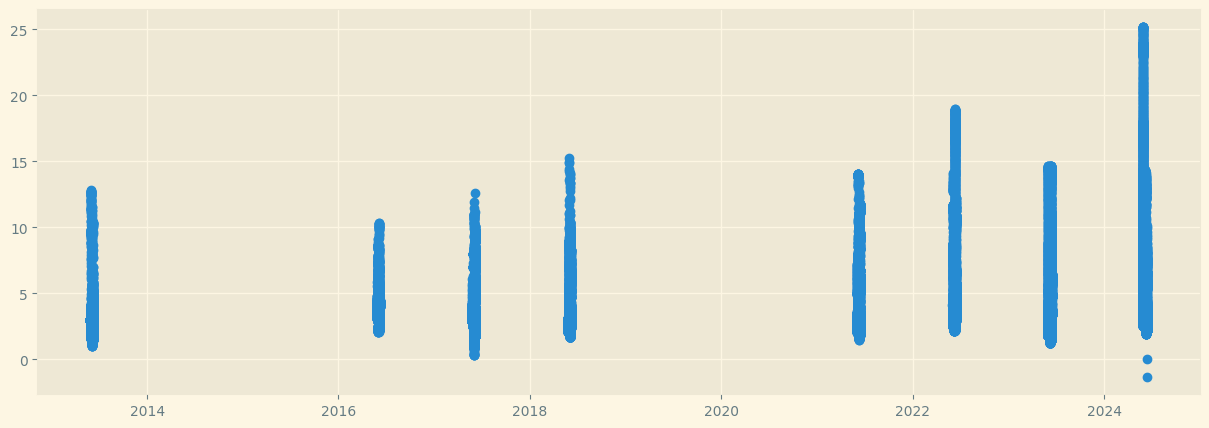

In [56]:
plt.rcParams['figure.figsize'] = [15, 5]
plt.scatter('DateTime', param, data=df)

In [57]:
df.dropna(subset=param).sort_values(by=param).tail(10)

,DateTime,Unnamed: 0,Longitude,Latitude,TempAir,PressAir,TempWtr,pCO2Air,pCH4Air,pCO2Wtr,...,Wdir,vx,vy,vesx,vesy,dateSec,dt,vesSpeed,winSpeed,WaterFlow1
112719,2024-05-27 10:26:00,115775.0,105.063845,51.899614,16.836667,0.945564,25.070000,NaN,1.919055,NaN,...,NaN,NaN,NaN,0.388910,0.222453,1716805560,60.0,0.007467,NaN,0.0
112728,2024-05-27 10:35:00,115784.0,105.063830,51.899619,17.943333,0.945445,25.073333,NaN,1.918997,NaN,...,NaN,NaN,NaN,-1.258238,-0.593207,1716806100,60.0,0.023184,NaN,0.0
112720,2024-05-27 10:27:00,115776.0,105.063867,51.899617,17.123333,0.945491,25.133333,NaN,1.918926,NaN,...,NaN,NaN,NaN,1.487009,0.370754,1716805620,60.0,0.025542,NaN,0.0
112727,2024-05-27 10:34:00,115783.0,105.063849,51.899625,17.496667,0.945451,25.140000,NaN,1.918990,NaN,...,NaN,NaN,NaN,0.183016,-0.556131,1716806040,60.0,0.009758,NaN,0.0
112721,2024-05-27 10:28:00,115777.0,105.063830,51.899606,17.133333,0.945475,25.160000,NaN,1.918916,NaN,...,NaN,NaN,NaN,-2.562231,-1.223489,1716805680,60.0,0.047323,NaN,0.0
112726,2024-05-27 10:33:00,115782.0,105.063846,51.899630,17.340000,0.945439,25.180000,NaN,1.918945,NaN,...,NaN,NaN,NaN,0.800697,2.558204,1716805980,60.0,0.044676,NaN,0.0
112725,2024-05-27 10:32:00,115781.0,105.063834,51.899607,17.270000,0.945447,25.200000,NaN,1.918940,NaN,...,NaN,NaN,NaN,-0.388910,-1.149338,1716805920,60.0,0.020223,NaN,0.0
112722,2024-05-27 10:29:00,115778.0,105.063823,51.899622,17.183333,0.945458,25.200000,NaN,1.918902,NaN,...,NaN,NaN,NaN,-0.434664,1.816696,1716805740,60.0,0.031133,NaN,0.0
112724,2024-05-27 10:31:00,115780.0,105.063840,51.899617,16.733333,0.945490,25.200000,NaN,1.919006,NaN,...,NaN,NaN,NaN,-0.068631,1.038112,1716805860,60.0,0.017340,NaN,0.0
112723,2024-05-27 10:30:00,115779.0,105.063841,51.899608,16.910000,0.945460,25.200000,NaN,1.918925,NaN,...,NaN,NaN,NaN,1.212484,-1.631318,1716805800,60.0,0.033876,NaN,0.0


In [ ]:
## wrong data while starting measurements
filter_list = [{'date_start': '2024-05-20 00:00', 'date_stop': '2024-05-30 04:48', 'cols': ['pCO2Air', 'pCH4Air'], 'fill_with': np.NaN},   # Wrong data
               {'date_start': '2021-06-02 18:50', 'date_stop': '2021-06-02 18:54', 'cols': ['pCO2Wtr', 'dpCO2'], 'fill_with': np.NaN},   # Wrong data
               {'date_start': '2021-06-02 20:56', 'date_stop': '2021-06-02 20:57', 'cols': ['pCO2Wtr', 'dpCO2'], 'fill_with': np.NaN},   # Wrong data
               {'date_start': '2021-06-12 07:41', 'date_stop': '2021-06-12 07:41', 'cols': ['pCO2Wtr', 'dpCO2'], 'fill_with': np.NaN},   # Wrong data
               {'date_start': '2024-06-03 03:33', 'date_stop': '2024-06-03 03:33', 'cols': ['pCO2Wtr', 'dpCO2'], 'fill_with': np.NaN},   # Wrong data
              ]

for cycle in filter_list:
    for col in cycle['cols']:
        date_start = pd.to_datetime(cycle['date_start'])
        date_stop = pd.to_datetime(cycle['date_stop'])
        df.loc[(df['DateTime'] >= date_start) & (df['DateTime'] <= date_stop), col] = cycle['fill_with']

df.loc[(df['year'] == 2018) & (df['dpCO2'] >= 600), ['dpCO2', 'cCO2Wtr', 'pCO2Wtr']] = np.NaN
df.loc[(df['year'] == 2021) & (df['dpCO2'] <= -350), ['dpCO2', 'cCO2Wtr', 'pCO2Wtr']] = np.NaN
df.loc[(df['year'] == 2023) & (df['dpCO2'] >= 600), ['dpCO2', 'cCO2Wtr', 'pCO2Wtr']] = np.NaN
df.loc[(df['year'] == 2024) & (df['dpCO2'] >= 600), ['dpCO2', 'cCO2Wtr', 'pCO2Wtr']] = np.NaN
df.loc[df['cCO2Wtr'] >= 3.25, ['dpCO2', 'cCO2Wtr', 'pCO2Wtr']] = np.NaN


In [ ]:
plt.rcParams['figure.figsize'] = [10,5]
#plt.ylim(-450, -250)
plt.scatter('DateTime', 'cCO2Wtr', s=1, data=df.loc[df['year']==2024, :], c='red')
plt.scatter('DateTime', 'cCO2Wtr', s=1, data=df)

#plt.scatter('DateTime', 'vCO2Air', s=1, data=df.loc[(df['DateTime'] > pd.to_datetime('30.05.2024 00:00', dayfirst=True)) & (df['DateTime'] < pd.to_datetime('30.05.2024 07:00', dayfirst=True)), :])

In [ ]:
central_stations = {}
for key, coor in scheme.central.items():
    central_stations[key] = scheme.get_center(coor)
central_stations

In [ ]:
dfc = pd.DataFrame.from_dict(central_stations, orient='index')
dfc.columns = ['Latitude', 'Longitude']
dfp = pd.DataFrame.from_dict(scheme.points, orient='index')
dfp.columns = ['Latitude', 'Longitude']
dfp.reset_index(drop=False, inplace=True, names='place')

In [ ]:
plt.rcParams['figure.figsize'] = [30, 30]
plt.scatter('Longitude', 'Latitude', data=df.loc[df['year'] == 2013,:], s=2, alpha=0.1)
#plt.scatter('Longitude', 'Latitude', data=dfj, s=2, c='green', alpha=0.1)
plt.scatter('Longitude', 'Latitude', data=dfc, s=20, c='red', alpha=1)
plt.scatter('Longitude', 'Latitude', data=dfp, s=10, c='darkred', alpha=1)
plt.plot('long', 'lat', 'b-', data=obris, alpha=1)
#plt.xlim(106.8, 107)
#plt.ylim(52.6, 52.8)
#plt.xlim(104, 105)
#plt.ylim(51.4, 52)
for name, coor in central_stations.items():
    plt.annotate(name, (coor[1]+0.001, coor[0]+0.002))
for name, coor in scheme.points.items():
    plt.annotate(name, (coor[1]+0.001, coor[0]+0.002))
plt.savefig('track_2_3.png')

In [ ]:
df['Station'] = ''
DLAT = 0.01
DLNG = 0.02

for k, v in central_stations.items():
    df.loc[(df['Latitude'].between(v[0]-DLAT, v[0]+DLAT) & df['Longitude'].between(v[1]-DLNG, v[1]+DLNG)), 'Station'] = k

In [ ]:
dfg = df.groupby(by=['year', 'Station'])['cCO2Wtr'].agg(['count', 'mean', 'median', 'std'])
dfg

In [ ]:
dfg.to_csv('CO2CentralStationAllSpring.dat', sep='\t')

In [ ]:
meteo = pd.read_csv(os.path.join(pwd, 'meteo.txt'),
                    sep='\t',
                    decimal='.',
                    parse_dates=['DateTime'],
                    dayfirst=False,
                   )

colsneeded = ['DateTime', 'vx', 'vy', 'Wh', 'Wdir']
meteo.drop(columns=[col for col in meteo.columns if col not in colsneeded], axis='columns', inplace=True)
# meteo = meteo.loc[meteo['DateTime'] < pd.to_datetime('2024-07-01'), :]
meteo

In [ ]:
## some wrong data while severe wind unsyncronized the UltraSonic threshold 
meteo.loc[meteo['vy'] > 20, 'vy'] = np.nan

In [ ]:
plt.rcParams['figure.figsize'] = [12,5]
plt.scatter('DateTime', 'vx', data=meteo, alpha=0.4, s=1, c='red')
plt.scatter('DateTime', 'vy', data=meteo, alpha=0.4, s=1, c='blue')
plt.xlim(pd.to_datetime('2021-06-06 12:00'), pd.to_datetime('2021-06-07'))

In [ ]:
meteo = meteo.resample('1min', on='DateTime').mean()
meteo.reset_index(drop=False, inplace=True)
meteo

In [ ]:
meteo.dropna(axis='index', subset=['vx', 'vy'], inplace=True)

In [ ]:
meteo

In [ ]:
df = pd.merge(left=df, right=meteo, left_on='DateTime', right_on='DateTime', how='outer').sort_values(by='DateTime')

In [ ]:
df

In [ ]:
## vesx: RV x offset along longitude, vesy: RV y offset along latitude (meters)
df['vesx'] = dist((df['Longitude'], df['Latitude']), (df['Longitude'].shift(1), df['Latitude'])) * np.sign(df['Longitude']-df['Longitude'].shift(1)) * 1000  ## meters per sec
df['vesy'] = dist((df['Longitude'], df['Latitude']), (df['Longitude'], df['Latitude'].shift(1))) * np.sign(df['Latitude']-df['Latitude'].shift(1)) * 1000
df['dateSec'] = df['DateTime'].astype('int64')/10**9  ## seconds
df['dt'] = (df['dateSec'] - df['dateSec'].shift(1))
df['vesSpeed'] = np.sqrt(np.power(df['vesx'], 2) + np.power(df['vesy'], 2)) / df['dt']

In [ ]:
df['winSpeed'] = np.sqrt(np.power(df['vx'],2) + np.power((df['vy'] - df['vesy']/df['dt']),2))

In [ ]:
df.loc[(df['DateTime'] > pd.to_datetime('2023-06-01 01:10')) & (df['DateTime'] < pd.to_datetime('2023-06-01 01:30')), ['DateTime', 'Longitude', 'vesx', 'Latitude', 'vesy', 'Speed', 'vesSpeed', 'vx', 'vy', 'winSpeed', 'Wh']]

In [ ]:
plt.rcParams['figure.figsize'] = [25, 10]
#plt.scatter('DateTime', 'vesSpeed', data=df.loc[df['year']==2023,:], s=1, alpha=0.5)
plt.scatter('DateTime', 'Speed', data=df.loc[df['year']==2023,:], s=1, alpha=0.5, c='red')
plt.scatter('DateTime', 'winSpeed', data=df.loc[df['year']==2023,:], s=6, alpha=0.5, c='green')
plt.scatter('DateTime', 'Wh', data=df.loc[df['year']==2023,:], s=3, alpha=0.2, c='blue')
plt.plot('DateTime', 'winSpeed', data=df.loc[df['year']==2023,:], c='green')
plt.legend()
plt.ylim(0, 10)
#plt.xlim(pd.to_datetime('2023-06-01 00:00'), pd.to_datetime('2023-06-02 15:00'))

In [ ]:
batlegend = pd.read_csv(batimetrFile,
                         nrows=6,
                         decimal='.',
                         sep=r'\s+',
                         index_col=0,
                         header=None,
                        )
batlegend = batlegend.T
na_val = batlegend['nodata_value']

In [ ]:
batimetria = pd.read_csv(batimetrFile,
                         skiprows=6,
                         decimal='.',
                         sep=r'\s+',
                         na_values=na_val,
                         index_col=False,
                         header=None,
                        )

# batimetria.dtypes\
xllcorner = batlegend.loc[1, 'xllcorner']
yllcorner = batlegend.loc[1, 'yllcorner']
cellsize = batlegend.loc[1, 'cellsize']

In [ ]:
yllcorner

In [ ]:
batimetria

In [ ]:
## plt.rcParams['figure.figsize'] = [4, 4]
plt.imshow(batimetria)

In [ ]:
#df['depth'] = batimetria.iloc[((df['Latitude'] - yllcorner) / cellsize).astype('int32'),((df['Longitude'] - xllcorner) / cellsize).astype('int32')]
yllcorner_m = yllcorner + batimetria.shape[0] * cellsize
yllcorner_m

In [ ]:
df = df.dropna(axis='index', subset=['Longitude', 'Latitude'], inplace=False)

In [ ]:
df['batix'] = ((df['Longitude'] - xllcorner) / cellsize).astype('int32')
df['batiy'] = ((yllcorner_m - df['Latitude']) / cellsize).astype('int32')
df.columns

In [ ]:
#df = (pd.merge(df, batimetria.stack().rename("depth"), left_on=["batiy", "batix"], right_index=True, how="left"))
df['depth'] = batimetria.to_numpy()[df['batiy'], df['batix']]
df

In [ ]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.scatter(df['Longitude'], df['Latitude'], s=10, c=df['year'], marker='o', linewidth=0, alpha=0.5)
plt.plot(obris['long'], obris['lat'], 'b-')
plt.colorbar()

In [ ]:
longStep = 0.01
latStep = 0.005

df['long'] = (df['Longitude']/longStep).round()*longStep
df['lat'] = (df['Latitude']/latStep).round()*latStep

In [ ]:
#func_list = ['mean', 'count']
func_list = ['mean']
cols_to_calc = {'pCO2Wtr': func_list,
                'pCH4Wtr': func_list,
                'cCO2Wtr': func_list,
                'cCH4Wtr': func_list,
                'dpCO2': func_list,
                'dpCH4': func_list,
                'pCO2Air': func_list,
                'pCH4Air': func_list,
                'depth': ['mean']}
res = df.groupby(['year', 'long', 'lat'], as_index=False).agg(cols_to_calc)
res

In [ ]:
for yr in range(2013, 2024):
    t = res.loc[res['year'] == yr].shape
    print(f'{yr}: {t[0]}')

In [ ]:
plt.rcParams['figure.figsize'] = [8,10]
plt.plot('long', 'lat', data=obris, markersize=1, alpha=1)
plt.scatter('long', 'lat', data=res, s=20, alpha=0.1, c=res[('dpCO2', 'mean')], cmap='rainbow')
plt.colorbar()
plt.clim(-200,200)
#for yr in [2013, 2016, 2017, 2018, 2020, 2021, 2022, 2023, 2024]:
#for yr in [2024]:
#    plt.scatter('long', 'lat', data=res.loc[res['year']==yr, :], s=20, alpha=0.1, c=res.loc[res['year']==yr, ('dpCO2', 'mean')], cmap='Paired')
    #plt.colorbar()

In [ ]:
res.describe()

In [ ]:
func_list = ['mean', 'std', 'count']

cols_to_calc = {('cCH4Wtr', 'mean'): func_list,
                ('depth', 'mean'): func_list,
               }
res = res.groupby(['long', 'lat'], as_index=False).agg(cols_to_calc)
res

In [ ]:
destData

In [ ]:
res.to_csv(destData,
res.to_csv(destData,
           sep='\t',
           )

In [64]:
df.to_csv(os.path.join(pwd, 'AllSea_.txt'),
           sep='\t'
          )

In [ ]:
%matplotlib inline
valMax = res[('cCH4Wtr','mean')].max

fig, ax = plt.subplots()
ax.set_xlim(106.2, 107.8)
ax.set_ylim(52, 53)

# wether this or those
ax.scatter(res['long'], res['lat'], c=res[('cCH4Wtr', 'mean', 'mean')], s=40, marker='s', linewidth=0, cmap='rainbow', alpha=0.1)
ax.plot(obris['long'], obris['lat'], 'b-')

fig.savefig('gis.png')

In [ ]:
df.info()

In [ ]:
df.to_csv(os.path.join(pwd, 'all_.txt'), sep='\t')

In [ ]:
pwd